<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-данных" data-toc-modified-id="Загрузка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

*Набор данных находится в файле /datasets/insurance.csv.*

* **Признаки:** пол, возраст и зарплата застрахованного, количество членов его семьи.
* **Целевой признак:** количество страховых выплат клиенту за последние 5 лет.

## Загрузка данных

***Откроем файлы и изучим их.***

*Импортируем необходимые библиотеки.*

In [ ]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') # уберем некритические предупреждения в код

pd.set_option('display.float_format', '{:.3f}'.format) #вывод значения float до 3 знаков после запятой

*Напишем функцию для загрузки данных, посмотрим первые 5 строк датасета, с помощью метода info() изучим структуры таблиц: типы данных, количество строк, столбцов, пропущенных данных и наличие дубликатов.*

In [ ]:
def data_read(file):
    # читаем данные из .csv файла с помощью метода read_csv()
    data = pd.read_csv(file)
    display(data.head())
    print()
    print('Количество пропусков:')
    print(data.isna().sum())
    print()
    data.info()
    print()
    print('Количество дубликатов:', sum(data.duplicated()))
    return data

In [ ]:
# исходные данные
data = data_read('/datasets/insurance.csv')

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.000,49600.000,1,0
1,0,46.000,38000.000,1,1
2,0,29.000,21000.000,0,0
3,0,21.000,41700.000,2,0
4,1,28.000,26100.000,0,0



Количество пропусков:
Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB

Количество дубликатов: 153


*Видим наличие дубликатов. Удалим их.*

In [ ]:
data.drop_duplicates(inplace=True)
data.duplicated().sum()

0

*Посмотрим основные статистические показатели данных.*

In [ ]:
data.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,4847.000,4847.000,4847.000,4847.000,4847.000
mean,0.498,31.024,39895.812,1.203,0.152
std,0.500,8.488,9972.954,1.099,0.469
min,0.000,18.000,5300.000,0.000,0.000
25%,0.000,24.000,33200.000,0.000,0.000
50%,0.000,30.000,40200.000,1.000,0.000
75%,1.000,37.000,46600.000,2.000,0.000
max,1.000,65.000,79000.000,6.000,5.000


* *Пол - данные практически равномерно распределены между мужчинами и женщинами.*
* *Возраст - средний возраст застрахованного составляет 31 год, медиана составляет 30 лет.*
* *Члены семьи - половина клиентов не имеет семьи.*
* *Средняя зарплата 40 000 руб.*

*Построим матрицу корреляций.*

<AxesSubplot:>

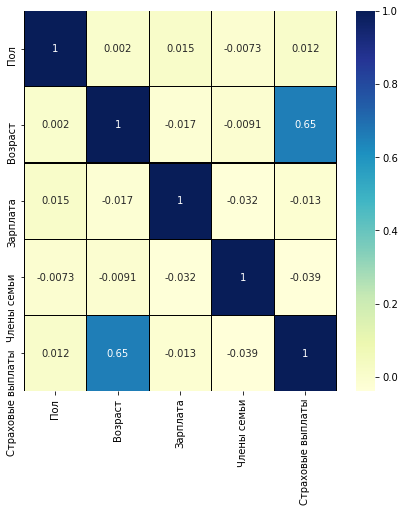

In [ ]:
plt.rcParams['figure.figsize'] = (7.0, 7.0)
sns.heatmap(data.corr(), annot=True, cmap='YlGnBu', linewidths=0.1, linecolor='black')

*Матрица корелляций показывает зависимость страховых выплат от возраста.\
Значительных зависимостей между обучающими признаками нет.*

*Посмотрим зависимость между возрастом и страховыми выплатами.*

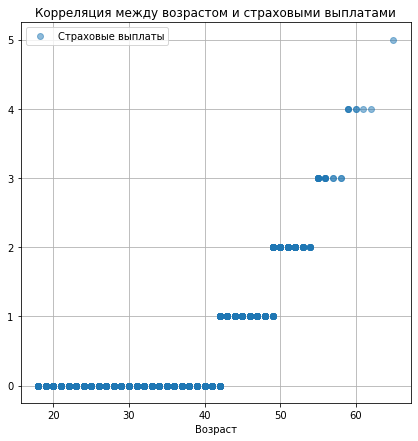

In [ ]:
data.plot(x='Возраст', y='Страховые выплаты',style='o', alpha=0.5, grid=True)
plt.title('Корреляция между возрастом и страховыми выплатами')
plt.show()

*Чем больше возраст застрахованного лица, тем больше вероятность того, что ему потребуются страховые выплаты.*

**Вывод:**
* Загружены и изучены данные
* Все данные в датасете заполнены (пропусков нет).
* Выявлены и удалены дубликаты.
* Основные статистические показатели данных:
    * *Пол - данные практически равномерно распределены между мужчинами и женщинами.*
    * *Возраст - средний возраст застрахованного составляет 31 год, медиана составляет 30 лет.*
    * *Члены семьи - половина клиентов не имеет семьи.*
    * *Средняя зарплата 40 000 руб.*
* Матрица корелляций показала зависимость страховых выплат от возраста: чем больше возраст застрахованного лица, тем больше вероятность того, что ему потребуются страховые выплаты.

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.*

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** не изменится

**Обоснование:**

Если любую матрицу A умножить на единичную (или наоборот), получится эта же матрица A (1):

$$
AE = EA = A
$$

Обратная для квадратной матрицы A (англ. inverse matrix) — матрица A с верхним индексом -1, произведение которой на А равно единичной матрице. Умножение может быть в любом порядке (2):

$$
AA^{-1}=A^{-1}A
$$

Свойства матриц, которые нам понадобятся (3), (4):

$$
(AB)^{T}=B^{T}A^{T}
$$
$$
(AB)^{-1}=B^{-1}A^{-1}
$$

Предположим что $a = a'$, где $a'$ - это предсказание, в которое мы передали матрицу признаков $X$, умноженную на матрицу

Получим предсказания для домноженных признаков.\
Умноженная матрица будет иметь вид $XP$. Фомула предсказаний примет следующий вид:

$$
a'=XPw'
$$

Подставим в формулу предсказаний формулу обучения. Получим:

$$
a'=XP((XP)^T XP)^{-1} (XP)^T y
$$

Преобразуем уравнение с помощью свойства (3):

$$
a'=XP(P^T X^T XP)^{-1} P^T X^T y
$$

Преобразуем уравнение с помощью свойства (4):

$$
a'=XP(X^T XP)^{-1} (P^T)^{-1} P^T X^T y = XP (P)^{-1}(X^T X)^{-1} (P^T)^{-1} P^T X^T y
$$

Преобразуем уравнение с помощью свойства (1) и сократим его:

$$
a'=XE(X^T X)^{-1} E X^T y=X(X^T X)^{-1} X^Ty
$$


Так как
$$
a'= X(X^T X)^{-1} X^Ty
$$
$$
w = (X^T X)^{-1} X^T y
$$
То $a'=Xw$, $a=a'$

*Следовательно, домножение признаков на обратимую матрицу не влияет на качество линейной регрессии.\
Что и требовалось докозать.*

**Вывод:**\
Теоретически доказали, что при умножении признаков на обратимую матрицу, качество линейной регрессии не изменяется.

## Алгоритм преобразования

**Алгоритм**


*Напишем класс для создания алгоритма, применив матричные операции.*

In [ ]:
# класс линейной регрессии
class LinearRegression:
 # метод обучения модели для матрицы признаков
    def fit(self, train_features, train_target):
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        # вектов весов для матрицы признаков
        self.w = np.linalg.inv(X.T @ X) @ X.T @ y

# метод обучения модели для матрицы зашифрованных данных
    def fit_encryption(self, train_features, train_target):
        # Формируем матрицу X с первым единичным полем
        X = np.concatenate((np.ones((train_features.shape[0], 1)), train_features), axis=1)
        y = train_target
        # Формируем рандомную квадратную матрицу 5 на 5
        self.P = np.random.normal(0, 100, (5,5))
        # Проверим, обратима ли матрица
        np.linalg.inv(self.P )
        #  матрица зашифрованных данных
        Z = X @ self.P
        self.w = np.linalg.inv(Z.T @ Z) @ Z.T @ y

# метод получения прогноза для матрицы признаков
    def predict(self, test_features):
        X = np.concatenate((np.ones((test_features.shape[0], 1)), test_features), axis=1)
        A = X @ self.w
        return A

# метод получения прогноза для матрицы зашифрованных данных
    def predict_encryption(self, test_features):
        X = np.concatenate((np.ones((test_features.shape[0], 1)), test_features), axis=1)
        Z = X @ self.P
        A_1 = Z @ self.w
        return A_1

**Обоснование**


*В основе написанного алгоритма лежит доказанное выше утверждение.*

**Вывод:**\
Написали класс для создания алгоритма, применив матричные операции.

## Проверка алгоритма

In [ ]:
features = data.drop('Страховые выплаты', axis=1)
target = data['Страховые выплаты']

In [ ]:
# прогнозная модель для матрицы признаков
model = LinearRegression()
model.fit(features, target)
predictions_X = model.predict(features)

In [ ]:
# прогнозная модель для зашифрованной матрицы
model.fit_encryption(features, target)
predictions_Z = model.predict_encryption(features)

In [ ]:
# сведём R2 показатели для матрицы признаков(нешифрованных данных) и зашифрованной матрицы(шифрованные данные)
data_result = pd.DataFrame({'Тип данных' : ['нешифрованные данные',
                                            'шифрованные данные'],
                            'R2-score'   : [r2_score(target, predictions_X),
                                            r2_score(target, predictions_Z)]})
data_result

,Тип данных,R2-score
0,нешифрованные данные,0.430
1,шифрованные данные,0.430


*Метрики R2 обеих моделей одиннаковые, следовательно умножение исходных данных на случайную обратимую матрицу может быть применено для шифрования.*

**Вывод:**
* Загрузили и изучили данные.
* Пропусков нет. Дубликаты удалены.
* Найдена зависимость количества страховых выплат за последние пять лет от возраста клиента.
* Теоретически обосновали, что при умножении признаков на обратимую матрицу, качество линейной регрессии не изменяется.
* Написан алгоритм преобразования, основанный на теоретически доказанном утверждении.
* Практически проверили алгоритм: метрики R2 обеих моделей (нешифрованных и шифрованных данных) совпадают.
* Умножение исходных данных на случайную обратимую матрицу может быть применено для шифрования данных.